In [107]:


dat_df =pd.read_csv(dat_user_event_results)
dat_not_df = pd.read_csv(dat_not_user_event_result)
dat_not_df.head()

,id,model,imei,battery_charge_count,battery_charge_avg_time,battery_charge_sum
0,05O55G5O55QJQ4GTP4Q055PO,SO-01J,358970072842794,1434,10600.0,15201076
1,05O55J5455QQL4TTP4T055PJ,SC-04J,355246089382436,124,20712.0,2568277
2,05O55L5455QJ445TP4J055PG,SO-04K,353651090969588,25,9545.0,238621
3,05O55Q5555QOO4JTP40055P5,SO-03J,354443082408604,1155,11381.0,13145271
4,45O5555O55QJQ45TP4G055P5,F-04J,353223088212031,63,5295.0,333612


In [95]:
dat_df.head(10)

,id,model,imei,battery_charge_count,battery_charge_avg_time,battery_charge_sum
0,05O5555J55QLO4TTP4Q055PJ,SH-01K,353013082460797,11,18971.0,208685
1,05O5555O55Q4N4JTP4L055PL,SH-04H,356101075988457,351,9999.0,3509551
2,05O55O5O55Q5J4JTP4L055PJ,SO-02J,355586080094260,294,9189.0,2701481
3,45O5505T55Q054LTP4T055PN,SC-04J,355246085405702,381,6738.0,2567235
4,45O55G5455QNQ4NTP4O055PN,F-01H,354017060692544,1513,9553.0,14453987
5,45O55G5O55Q0G4GTP4T055P5,F-04J,353223083108861,646,20237.0,13073184
6,45O55G5O55QNN4NTP4T055PL,F-03H,356398072633959,327,14015.0,4582948
7,45O55O5555Q4G4GTP44055PQ,SC-04J,355246088313523,126,15627.0,1968944
8,45O55O5J55QOQ4JTP4G055P5,SO-02J,358969077798480,934,20121.0,18793329
9,45O55O5T55QGT44TP44055PO,F-05J,354543082836199,74,17418.0,1288935


In [105]:
dat_df['model'].value_counts().head()

SO-01J    823
SH-04H    730
SH-01K    460
SC-02H    459
SO-02J    457
Name: model, dtype: int64

In [104]:
dat_not_agg_df = dat_not_df.groupby('model').agg({'battery_charge_count':[sum,"count","mean"]})
dat_not_agg_df.columns = ['dat_not_sum','dat_not_count','dat_not_mean']
dat_not_agg_df=dat_not_agg_df.reset_index()
dat_not_agg_df.head()

,model,dat_not_sum,dat_not_count,dat_not_mean
0,DM-01J,28062,44,637.772727
1,DM-01K,4811,40,120.275000
2,DM-02H,48677,57,853.982456
3,F-01H,49413,78,633.500000
4,F-01J,120097,188,638.813830


In [103]:
dat_agg_df=dat_df.groupby('model').agg({'battery_charge_count':[sum,"count","mean"]})
dat_agg_df.columns = ['dat_sum','dat_count','dat_mean']
dat_agg_df=dat_agg_df.reset_index()
dat_agg_df.head()

,model,dat_sum,dat_count,dat_mean
0,DM-01J,56512,103,548.660194
1,DM-01K,12617,71,177.704225
2,DM-02H,46993,64,734.265625
3,F-01H,99706,140,712.185714
4,F-01J,166278,192,866.031250


In [102]:
result = pd.merge(dat_agg_df,
                 dat_not_agg_df[['model','dat_not_sum', 'dat_not_count', 'dat_not_mean']],
                 on='model')
#restult=result.reset_index()
result.head()

,model,dat_sum,dat_count,dat_mean,dat_not_sum,dat_not_count,dat_not_mean
0,DM-01J,56512,103,548.660194,28062,44,637.772727
1,DM-01K,12617,71,177.704225,4811,40,120.275000
2,DM-02H,46993,64,734.265625,48677,57,853.982456
3,F-01H,99706,140,712.185714,49413,78,633.500000
4,F-01J,166278,192,866.031250,120097,188,638.813830


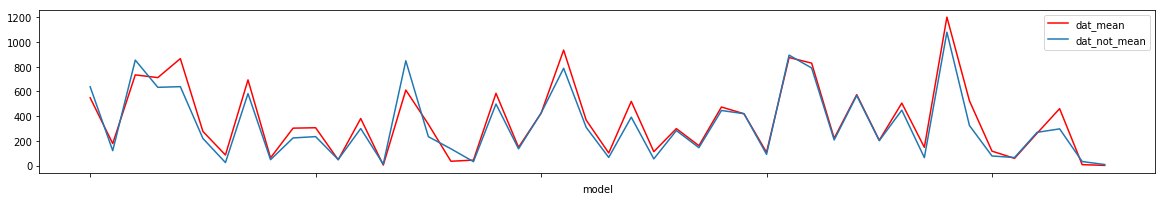

In [145]:
from matplotlib import pyplot as plt
ax = plt.gca()

result.plot(kind='line',x='model',y='dat_mean',color='red',ax=ax)
result.plot(kind='line',x='model',y='dat_not_mean', ax=ax)
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

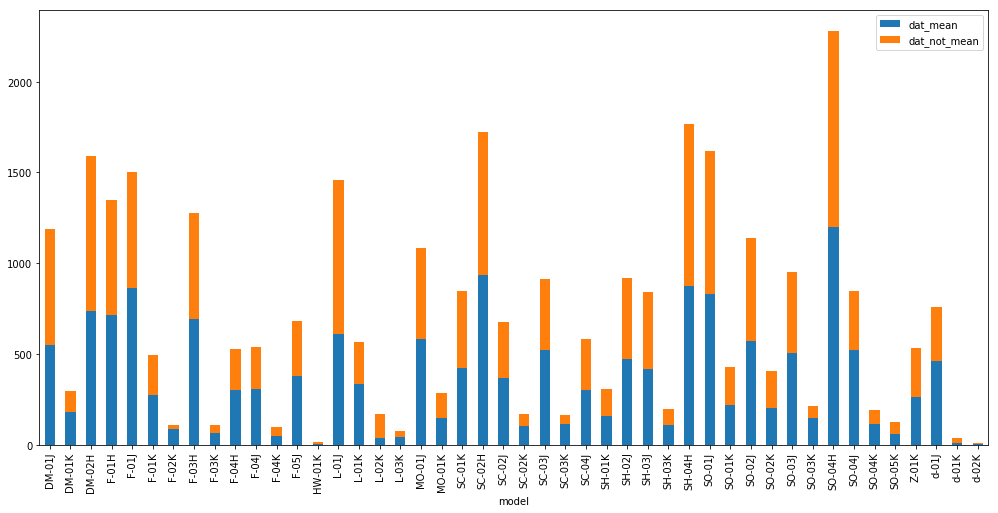

In [153]:
plt.rcParams["figure.figsize"] = (17,8)
#result.plot(kind='bar',x='model',y='dat_sum')
result.plot(kind='bar',stacked=True,x='model',y=['dat_mean','dat_not_mean'])
plt.show()

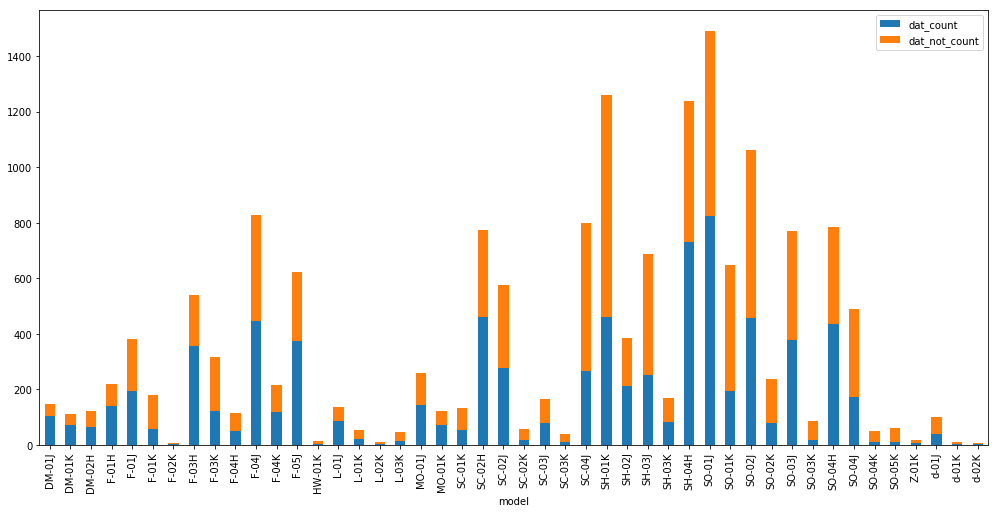

In [154]:
plt.rcParams["figure.figsize"] = (17,8)
#result.plot(kind='bar',x='model',y='dat_sum')
result.plot(kind='bar',stacked=True,x='model',y=['dat_count','dat_not_count'])
plt.show()